In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/drive/MyDrive/DL_JHU_project/CAMS-main/dataset (7).csv'
data = pd.read_csv(file_path)
print(data.columns)

#get list of all the clases from category
classes = data['category'].unique()
print(classes)
category="category"
if data[category].isna().sum() > 0:
    print(f"Found {data[category].isna().sum()} NaN values in the target column.")
    # Option 1: Drop rows with NaN values
    data = data.dropna(subset=[category])

# Assume 'target' is the column with class labels
category = "category"
# Split into train+val and test sets
train_val, test = train_test_split(data, test_size=0.06, stratify=data[category], random_state=42)

# Further split train+val into train and val
train, val = train_test_split(train_val, test_size=0.14, stratify=train_val[category], random_state=42)

# Output the sizes of each split
print(f"Train size: {len(train)}")
print(f"Validation size: {len(val)}")
print(f"Test size: {len(test)}")


Index(['text', 'category', 'explanation'], dtype='object')
[ 5.  4.  2.  3.  0.  1. nan]
Found 9 NaN values in the target column.
Train size: 4076
Validation size: 664
Test size: 303


In [4]:
import pandas as pd

# Copy 220 random samples from train to val
extra_val_samples = train.sample(n=720, random_state=42)
val_with_extra = pd.concat([val, extra_val_samples])

# Copy 150 random samples from train to test
extra_test_samples = train.sample(n=580, random_state=42)
test_with_extra = pd.concat([test, extra_test_samples])

# Check the sizes after adding extra samples
print(f"New Validation size: {len(val_with_extra)}")
print(f"New Test size: {len(test_with_extra)}")
print(f"Train size (unchanged): {len(train)}")


New Validation size: 1384
New Test size: 883
Train size (unchanged): 4076


In [5]:
# ## Training and Testing files
# read_file = pd.read_csv('/content/drive/MyDrive/DL_JHU_project/CAMS-main/CAMS/data/IntentSDCNL_Training.csv', encoding = "ISO-8859-1")
# read_file1 = pd.read_csv('/content/drive/MyDrive/DL_JHU_project/CAMS-main/CAMS/data/IntentSDCNL_Testing.csv', encoding = "ISO-8859-1")


# #training data
# df_train = pd.DataFrame(read_file, columns= ['selftext','ANNOTATIONS'])
# df_train = df_train.rename(columns={'selftext': 'text','ANNOTATIONS':'label'})
# df_train = df_train.convert_dtypes()

# #testing data
# df_test = pd.DataFrame(read_file1,columns= ['selftext','ANNOTATIONS'])####
# df_test = df_test.rename(columns={'selftext': 'text','ANNOTATIONS':'label'})
# df_test = df_test.convert_dtypes()
# df_train

## Training and Testing files
df_train = pd.read_csv('/content/drive/MyDrive/DL_JHU_project/dataset_train.csv', encoding = "ISO-8859-1")
df_test = pd.read_csv('/content/drive/MyDrive/DL_JHU_project/dataset_test.csv', encoding = "ISO-8859-1")
df_val = pd.read_csv('/content/drive/MyDrive/DL_JHU_project/dataset_val.csv', encoding = "ISO-8859-1")


#training data
# df_train = pd.DataFrame(read_file, columns= ['selftext','ANNOTATIONS'])
df_train = df_train.rename(columns={'selftext': 'text','ANNOTATIONS':'label'})
df_train = df_train.convert_dtypes()

#testing data
# df_test = pd.DataFrame(read_file1,columns= ['selftext','ANNOTATIONS'])####
df_test = df_test.rename(columns={'selftext': 'text','ANNOTATIONS':'label'})
df_test = df_test.convert_dtypes()

#validation data
# df_val = pd.DataFrame(read_file2,columns= ['selftext','ANNOTATIONS'])####
df_val = df_val.rename(columns={'selftext': 'text','ANNOTATIONS':'label'})
df_val = df_val.convert_dtypes()

In [6]:
len(df_train), len(df_test), len(df_val)

(4076, 1486, 1384)

In [7]:
df_test

,text,category,explanation
0,The company i work for is in a moving process ...,2,The company i work for is in a moving process ...
1,"I don't want to work, I don't want to travel, ...",2,"don't want to go back to college, learn new th..."
2,Hey. 16M here. IâÃÃ´m just a wee little hig...,2,"affecting my grades , could get away with doin..."
3,I tried to kill myself via partial suspension ...,3,"partial suspension hanging, headache"
4,IâÃÃ´m in my last year of compulsory school...,2,not allows to leave the school during break or...
...,...,...,...
1481,IâÃÃ´m 19 in ten minutes. Wish I was 17 aga...,5,since then everythingâÃÃ´s gone down hill
1482,"And as much as it hurts and exhausts you, you ...",4,"because of guilt, your own and what others put..."
1483,Now I can feel at least a little bit happy. L...,5,Let's wait and see if I'm going to win the who...
1484,"I'm tired of having a extremely hard life, my ...",4,"father used a crack and beat my mom, he's on c..."


In [8]:


#training data
# df_train = pd.DataFrame(read_file, columns= ['selftext','ANNOTATIONS'])
df_train = df_train.rename(columns={'ï»¿text': 'text','category':'label'})
df_train = df_train.convert_dtypes()

#testing data
# df_test = pd.DataFrame(read_file1,columns= ['selftext','ANNOTATIONS'])####
df_test = df_test.rename(columns={'ï»¿text': 'text','category':'label'})
df_test = df_test.convert_dtypes()

#validation data
# df_val = pd.DataFrame(read_file2,columns= ['selftext','ANNOTATIONS'])####
df_val = df_val.rename(columns={'ï»¿text': 'text','category':'label'})
df_val = df_val.convert_dtypes()
df_test.columns

Index(['text', 'label', 'explanation'], dtype='object')

In [9]:
# cams_file=pd.read_csv('/content/drive/MyDrive/DL_JHU_project/CAMS-main/CAMS/data/added_CAMS_data.csv', encoding = "ISO-8859-1")
# cams_test=pd.DataFrame(cams_file)####
# cams_test = cams_test.rename(columns={'selftext': 'text','cause':'label'})
# cams_test= cams_test.convert_dtypes()
# cams_test.drop(cams_test[cams_test.text=="emptypost"].index, inplace=True)
# cams_test.drop(cams_test[cams_test.label==" "].index, inplace=True)
# cams_test.dropna(inplace=True)
# # print(cams_test.info())
# cams_test

In [10]:
## some preprocessings due to wrong entries
df_test.drop(df_test[df_test.text=="emptypost"].index, inplace=True)
df_train.drop(df_train[df_train.text=="emptypost"].index, inplace=True)
df_test.drop(df_test[df_test.label==" "].index, inplace=True)
df_train.drop(df_train[df_train.label==" "].index, inplace=True)
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)
df_val.dropna(inplace=True)

In [11]:
frame = [df_test, df_train]
data =  pd.concat(frame)

In [12]:
! pip install transformers

In [13]:
from transformers import AutoTokenizer, AutoModel
import sys
import csv
import re
import string
import pickle
from collections import defaultdict
from nltk.corpus import stopwords
from nltk import word_tokenize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import nltk
from transformers import AdamW
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [14]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
stop_words = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

In [17]:
def clean_text(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = text.replace('x', '')
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    text = ' '.join(filtered_tokens)
    return text

In [18]:
# training data
df_train = df_train.reset_index(drop=True)
df_train['text'] = df_train['text'].apply(clean_text)
df_train['text'] = df_train['text'].str.replace('\d+', '')


# val data
df_val = df_val.reset_index(drop=True)
df_val['text'] = df_val['text'].apply(clean_text)
# df_val['text'] = df_val['text'].str.replace('\d+', '')

# testing data
df_test = df_test.reset_index(drop=True)
df_test['text'] = df_test['text'].apply(clean_text)
df_test['text'] = df_test['text'].str.replace('\d+', '')

In [19]:
len(df_train), len(df_test), len(df_val)

(3535, 1259, 1215)

In [20]:
max([len(text.split()) for text in df_train['text']])

1569

In [21]:
df_train

,text,label,explanation
0,want moment peace silenceim tired told shut ev...,4,"being bullied on a daily basis, humiliated, an..."
1,like much pain cant seem cry sit feeling fucki...,5,"feeling so numb , i do not care"
2,mean fucking awful man remember used help peop...,1,"I make people cry for no good reason, I feel f..."
3,growing people always tell somebody whoever wa...,1,"im nothing , worthless and nobody , cried with..."
4,hello using throwaway account frequent sub mai...,4,"can't trust my girlfriend, she ended pushing m..."
...,...,...,...
3530,first year college everytime go feel depressed...,2,first year in college and everytime i go i f...
3531,think get misinterpreted lot dont feel good im...,1,"get misinterpreted, need validation, don't fee..."
3532,okay etremely embarrassing called everything s...,2,"called lazy, out of employment, bullied by co-..."
3533,neither 2016also 20152014 whatever2013 nope201...,5,instead of working on my art and bounding with...


In [22]:
df_test

,text,label,explanation
0,company work moving process many departements ...,2,The company i work for is in a moving process ...
1,dont want work dont want travel dont want go b...,2,"don't want to go back to college, learn new th..."
2,hey 16m im wee little high schooler feel like ...,2,"affecting my grades , could get away with doin..."
3,tried kill via partial suspension hanging got ...,3,"partial suspension hanging, headache"
4,im last year compulsory school tried kill taki...,2,not allows to leave the school during break or...
...,...,...,...
1254,im 19 ten minutes wish 17 happiest year since ...,5,since then everythingâÃÃ´s gone down hill
1255,much hurts ehausts let pain better dealt ok be...,4,"because of guilt, your own and what others put..."
1256,feel least little bit happylets wait see im go...,5,Let's wait and see if I'm going to win the who...
1257,im tired etremely hard life father used crack ...,4,"father used a crack and beat my mom, he's on c..."


In [23]:
# # Global Variables

# max_nb_words = 60000
# max_features = 10543
# maxlen = 300
# emb_dim = 100
# batch_size = 32
# epochs  = 15

In [24]:
train_text, train_labels = df_train['text'], df_train['label']
val_text, val_labels = df_val['text'], df_val['label']
test_text, test_labels = df_test['text'], df_test['label']

In [25]:
# Defining some key variables that will be used later on in the training
from transformers import BertTokenizer

MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE =32
# EPOCHS = 1
LEARNING_RATE = 3e-5
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', truncation=True, do_lower_case=True)
encoded = tokenizer("Some text", "Some other text", return_tensors="pt", padding=True, truncation=True)
print(encoded.keys())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [26]:
# # tokenizer = AutoTokenizer.from_pretrained("mental/mental-bert-base-uncased", use_auth_token=True)
# tokenizer = AutoTokenizer.from_pretrained("mental/mental-roberta-base", use_auth_token=True)
# model = AutoModel.from_pretrained("mental/mental-roberta-base")

In [27]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length=MAX_LEN,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=True,  # Include token_type_ids
)

tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length=MAX_LEN,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=True,  # Include token_type_ids
)

tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length=MAX_LEN,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=True,  # Include token_type_ids
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [28]:
# tokens_val = tokenizer.batch_encode_plus(
#     val_text.tolist(),
#     max_length = MAX_LEN,
#     pad_to_max_length = True,
#     truncation = True,
#     return_token_type_ids =False,
# )
# tokens_test = tokenizer.batch_encode_plus(
#     test_text.tolist(),
#     max_length = MAX_LEN,
#     pad_to_max_length=True,
#     truncation=True,
#     return_token_type_ids=False
# )

In [29]:
# ### Creating Tensors from the train, validation and test sequences ###
# # for train set
# train_seq = torch.tensor(tokens_train['input_ids'])
# train_mask = torch.tensor(tokens_train['attention_mask'])
# train_y = torch.tensor(train_labels.tolist())

# # for validation set
# val_seq = torch.tensor(tokens_val['input_ids'])
# val_mask = torch.tensor(tokens_val['attention_mask'])
# val_y = torch.tensor(val_labels.tolist())

# # for test set
# test_seq = torch.tensor(tokens_test['input_ids'])
# test_mask = torch.tensor(tokens_test['attention_mask'])
# test_y = torch.tensor(test_labels.tolist())

In [30]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_token_type_ids = torch.tensor(tokens_train['token_type_ids'])  # Add this
train_y = torch.tensor(train_labels.tolist())

train_data = TensorDataset(train_seq.to(device), train_mask.to(device), train_token_type_ids.to(device), train_y.to(device))
train_sampler = RandomSampler(train_data)
trainloader = DataLoader(train_data, sampler=train_sampler, batch_size=TRAIN_BATCH_SIZE)

# For validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_token_type_ids = torch.tensor(tokens_val['token_type_ids'])  # Add this
val_y = torch.tensor(val_labels.tolist())

val_data = TensorDataset(val_seq.to(device), val_mask.to(device), val_token_type_ids.to(device), val_y.to(device))
val_sampler = SequentialSampler(val_data)
valloader = DataLoader(val_data, sampler=val_sampler, batch_size=VALID_BATCH_SIZE)

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_token_type_ids = torch.tensor(tokens_test['token_type_ids'])  # Add this

# If you have test labels (e.g., during evaluation):
test_y = torch.tensor(test_labels.tolist())
test_data = TensorDataset(test_seq.to(device), test_mask.to(device), test_token_type_ids.to(device), test_y.to(device))

# If labels are not available (e.g., for prediction only):
# test_data = TensorDataset(test_seq, test_mask, test_token_type_ids)

test_sampler = SequentialSampler(test_data)
testloader = DataLoader(test_data, sampler=test_sampler, batch_size=TEST_BATCH_SIZE)

### Defining dataloaders

In [31]:
# train_data = TensorDataset(train_seq, train_mask, train_y)
# train_sampler = RandomSampler(train_data)
# trainloader = DataLoader(train_data, sampler = train_sampler, batch_size = TRAIN_BATCH_SIZE)

# val_data = TensorDataset(val_seq, val_mask,val_y)
# val_sampler = SequentialSampler(val_data)
# valloader = DataLoader(val_data, sampler = val_sampler, batch_size = VALID_BATCH_SIZE)

In [32]:
len(trainloader), len(valloader), len(testloader)

(111, 38, 40)

In [33]:
from transformers import RobertaModel, RobertaTokenizer, BertTokenizer, BertModel
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class DynamicAttention(torch.nn.Module):
    def __init__(self, hidden_size):
        super(DynamicAttention, self).__init__()
        self.linear1 = torch.nn.Linear(hidden_size, hidden_size)
        self.linear2 = torch.nn.Linear(hidden_size, 1)

    def forward(self, hidden_states, attention_mask=None):
        x = torch.tanh(self.linear1(hidden_states))
        x = self.linear2(x)
        x = torch.squeeze(x, dim=-1)
        if attention_mask is not None:
            x = x.masked_fill(attention_mask == 0, -1e9)
        attention_weights = torch.softmax(x, dim=-1)
        context_vector = torch.sum(hidden_states * attention_weights.unsqueeze(-1), dim=1)
        return context_vector, attention_weights

class BertRoBERTaClass(torch.nn.Module):
    def __init__(self, bert_weight=0.5, roberta_weight=0.5):
        super(BertRoBERTaClass, self).__init__()
        self.bert_model = BertModel.from_pretrained("bert-base-uncased")
        self.roberta_model = RobertaModel.from_pretrained("roberta-base")
        self.attention = DynamicAttention(self.bert_model.config.hidden_size)
        self.pre_classifier = torch.nn.Linear(self.bert_model.config.hidden_size, self.bert_model.config.hidden_size)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(self.bert_model.config.hidden_size, 6)
        self.bert_weight = bert_weight
        self.roberta_weight = roberta_weight

    def forward(self, input_ids, attention_mask, token_type_ids):
        bert_output = self.bert_model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        roberta_output = self.roberta_model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_states = self.bert_weight * bert_output[0] + self.roberta_weight * roberta_output[0]
        context_vector, attention_weights = self.attention(hidden_states, attention_mask)
        pooler = context_vector
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

model = BertRoBERTaClass()
model.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertRoBERTaClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [34]:
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [35]:
device

'cuda'

In [36]:
torch.cuda.empty_cache()

In [37]:
model = BertRoBERTaClass()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
model.to(device)

BertRoBERTaClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

## Model

In [39]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from transformers import TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

In [40]:
# trainLabels = torch.tensor(train_labels.values)
# class_count = torch.bincount(trainLabels)
# class_weights = 1.0 / class_count
# class_weights /= torch.sum(class_weights)

# lossfn = nn.CrossEntropyLoss(weight=class_weights)
# lossfn.to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

trainLabels = torch.tensor(train_labels.values)
class_count = torch.bincount(trainLabels)  # Count samples per class
class_weights = 1.0 / class_count          # Inverse frequency
class_weights /= torch.sum(class_weights) # Normalize weights
class_weights = class_weights.to(device)  # Move weights to the same device

lossfn = nn.CrossEntropyLoss(weight=class_weights)  # Use class_weights
lossfn.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
criterion = nn.CrossEntropyLoss(weight=class_weights)
criterion.to(device)  # Move loss function to the correct device

CrossEntropyLoss()

In [41]:
epochs = 15

In [42]:
# # Define your training loop
# valAccList = []
# valLossList = []
# trainAccList = []
# trainLossList = []
# best_val_loss = float('inf')
# best_model = None

# for epoch in range(epochs):
#     print("Epoch:", epoch+1)
#     progress_bar = tqdm(trainloader)
#     model.train()

#     # Training loop
#     for batch in progress_bar:
#       inputs, mask, token_type_ids, labels = batch
#       inputs = inputs.to(device)
#       mask = mask.to(device)
#       token_type_ids = token_type_ids.to(device)
#       labels = labels.to(device)

#       optimizer.zero_grad()
#       outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)
#       loss = lossfn(outputs, labels)
#       loss.backward()
#       optimizer.step()

#       predictions = outputs.argmax(dim=-1)
#       acc = accuracy_score(labels.cpu().numpy(), predictions.cpu().numpy())
#       progress_bar.set_description(f"loss: {loss.item():.4f}, acc: {acc:.4f}")



#     model.eval()

#     train_predictions = []
#     train_labels = []
#     train_loss = 0

#     with torch.no_grad():
#         for batch in trainloader:
#             inputs, mask, token_type_ids, labels = batch
#             inputs = inputs.squeeze().to(device)
#             mask = mask.squeeze().to(device)
#             labels = labels.to(device)
#             outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)

#             loss = criterion(outputs, labels)

#             train_loss += loss
#             logits = outputs
#             train_predictions.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
#             train_labels.extend(labels.cpu().numpy().tolist())

#     train_acc = accuracy_score(train_labels, train_predictions)
#     train_loss /= len(train_labels)
#     print('Train accuracy:', train_acc)
#     print('Train Loss:', train_loss)
#     trainAccList.append(train_acc)
#     trainLossList.append(train_loss)

#     val_predictions = []
#     val_labels = []
#     val_loss = 0

#     with torch.no_grad():
#       for batch in valloader:
#           inputs, mask, token_type_ids, labels = batch
#           inputs = inputs.to(device)
#           mask = mask.to(device)
#           token_type_ids = token_type_ids.to(device)
#           labels = labels.to(device)

#           outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)
#           loss = lossfn(outputs, labels)
#           val_loss += loss.item()

#           logits = outputs
#           val_predictions.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
#           val_labels.extend(labels.cpu().numpy().tolist())


#     val_acc = accuracy_score(val_labels, val_predictions)
#     print('Validation accuracy:', val_acc)
#     print('Validation Loss:', val_loss)
#     valAccList.append(val_acc)
#     valLossList.append(val_loss)
#     val_loss /= len(val_labels)

#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         best_model = model.state_dict()

#     # scheduler.step()


In [43]:
import torch
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Initialize metric tracking lists and best model tracking
train_acc_list = []
train_loss_list = []
val_acc_list = []
val_loss_list = []
best_val_loss = float('inf')
best_model_state = None

# Move the model to the specified device once before the training loop
model.to(device)

for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs}")

    # Training Phase
    model.train()
    epoch_train_loss = 0.0
    epoch_train_correct = 0
    epoch_train_total = 0

    progress_bar = tqdm(trainloader, desc="Training")
    for batch in progress_bar:
        inputs, mask, token_type_ids, labels = batch
        inputs = inputs.squeeze().to(device)
        mask = mask.squeeze().to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)
        loss = lossfn(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss and correct predictions
        epoch_train_loss += loss.item() * labels.size(0)
        _, preds = torch.max(outputs, dim=1)
        epoch_train_correct += (preds == labels).sum().item()
        epoch_train_total += labels.size(0)

        # Update progress bar
        batch_loss = loss.item()
        batch_acc = (preds == labels).float().mean().item()
        progress_bar.set_postfix({'loss': f"{batch_loss:.4f}", 'acc': f"{batch_acc:.4f}"})

    # Calculate average loss and accuracy for the epoch
    avg_train_loss = epoch_train_loss / epoch_train_total+1e-25
    train_accuracy = epoch_train_correct / epoch_train_total+1e-25
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(train_accuracy)

    print(f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Validation Phase
    model.eval()
    epoch_val_loss = 0.0
    epoch_val_correct = 0
    epoch_val_total = 0

    with torch.no_grad():
        for batch in tqdm(valloader, desc="Validation", leave=False):
            inputs, mask, token_type_ids, labels = batch
            # print(f"Batch inputs shape: {inputs.shape}")  # Expected: [batch_size, seq_length]
            # print(f"Batch mask shape: {mask.shape}")      # Expected: [batch_size, seq_length]
            # print(f"Batch labels shape: {labels.shape}")  # Expected: [batch_size]

            inputs = inputs.squeeze().to(device)
            mask = mask.squeeze().to(device)
            labels = labels.to(device)
            token_type_ids = token_type_ids.to(device)

            outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)
            loss = lossfn(outputs, labels)

            # Accumulate loss and correct predictions
            epoch_val_loss += loss.item() * labels.size(0)
            _, preds = torch.max(outputs, dim=1)
            epoch_val_correct += (preds == labels).sum().item()
            epoch_val_total += labels.size(0)

    # Calculate average loss and accuracy for validation
    avg_val_loss = epoch_val_loss / epoch_val_total
    val_accuracy = epoch_val_correct / epoch_val_total
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(val_accuracy)

    print(f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Check if the current model is the best so far and save it
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_state = model.state_dict()
        torch.save(best_model_state, 'best_model.pth')
        print("Best model saved.")

    # Optional: Step the scheduler if you're using one
    # scheduler.step(avg_val_loss)


Epoch 1/15


Training: 100%|██████████| 111/111 [05:03<00:00,  2.73s/it, loss=1.6696, acc=0.2667]


Train Loss: 1.7137, Train Accuracy: 0.2950


Validation Loss: 1.4950, Validation Accuracy: 0.5070
Best model saved.
Epoch 2/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=1.3594, acc=0.6000]


Train Loss: 1.4488, Train Accuracy: 0.4368


Validation Loss: 1.3472, Validation Accuracy: 0.5564
Best model saved.
Epoch 3/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=1.1675, acc=0.4667]


Train Loss: 1.1915, Train Accuracy: 0.5284


Validation Loss: 1.2377, Validation Accuracy: 0.5333
Best model saved.
Epoch 4/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=1.2552, acc=0.6667]


Train Loss: 0.9373, Train Accuracy: 0.6243


Validation Loss: 1.1013, Validation Accuracy: 0.6206
Best model saved.
Epoch 5/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=0.8381, acc=0.5333]


Train Loss: 0.7217, Train Accuracy: 0.7092


Validation Loss: 1.0981, Validation Accuracy: 0.6395
Best model saved.
Epoch 6/15


Training: 100%|██████████| 111/111 [05:09<00:00,  2.78s/it, loss=0.4684, acc=0.9333]


Train Loss: 0.5525, Train Accuracy: 0.7810


Validation Loss: 1.0628, Validation Accuracy: 0.7136
Best model saved.
Epoch 7/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=0.2518, acc=0.9333]


Train Loss: 0.4085, Train Accuracy: 0.8362


Validation Loss: 1.1311, Validation Accuracy: 0.7457
Epoch 8/15


Training: 100%|██████████| 111/111 [05:07<00:00,  2.77s/it, loss=0.5615, acc=0.8667]


Train Loss: 0.3247, Train Accuracy: 0.8764


Validation Loss: 1.1588, Validation Accuracy: 0.7111
Epoch 9/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=0.1370, acc=0.9333]


Train Loss: 0.2360, Train Accuracy: 0.9154


Validation Loss: 1.2232, Validation Accuracy: 0.7564
Epoch 10/15


Training: 100%|██████████| 111/111 [05:07<00:00,  2.77s/it, loss=0.5648, acc=0.8000]


Train Loss: 0.1856, Train Accuracy: 0.9327


Validation Loss: 1.2099, Validation Accuracy: 0.7679
Epoch 11/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=0.2222, acc=0.9333]


Train Loss: 0.1449, Train Accuracy: 0.9491


Validation Loss: 1.3064, Validation Accuracy: 0.7556
Epoch 12/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=0.0278, acc=1.0000]


Train Loss: 0.1151, Train Accuracy: 0.9573


Validation Loss: 1.3168, Validation Accuracy: 0.7646
Epoch 13/15


Training: 100%|██████████| 111/111 [05:07<00:00,  2.77s/it, loss=0.1521, acc=0.9333]


Train Loss: 0.1197, Train Accuracy: 0.9567


Validation Loss: 1.1454, Validation Accuracy: 0.7720
Epoch 14/15


Training: 100%|██████████| 111/111 [05:08<00:00,  2.78s/it, loss=0.0480, acc=0.9333]


Train Loss: 0.0891, Train Accuracy: 0.9717


Validation Loss: 1.3401, Validation Accuracy: 0.7580
Epoch 15/15


Training: 100%|██████████| 111/111 [05:07<00:00,  2.77s/it, loss=0.3958, acc=0.9333]


Train Loss: 0.0648, Train Accuracy: 0.9802


Validation Loss: 1.4025, Validation Accuracy: 0.7811


In [44]:
epochs = list(range(1, epochs + 1))

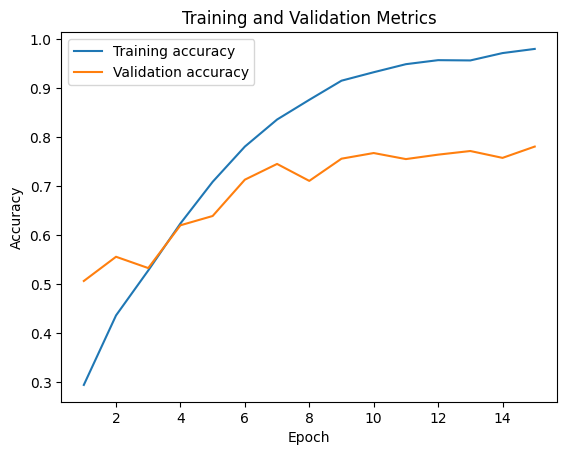

In [45]:
plt.plot(epochs, train_acc_list, label='Training accuracy')
plt.plot(epochs, val_acc_list, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [46]:
# trainLossList = [float(tloss) for tloss in trainLossList]  # Convert numpy arrays to floats
# valLossList = [float(vloss) for vloss in valLossList]      # Convert floats (or tensors) to floats
# print(trainLossList)

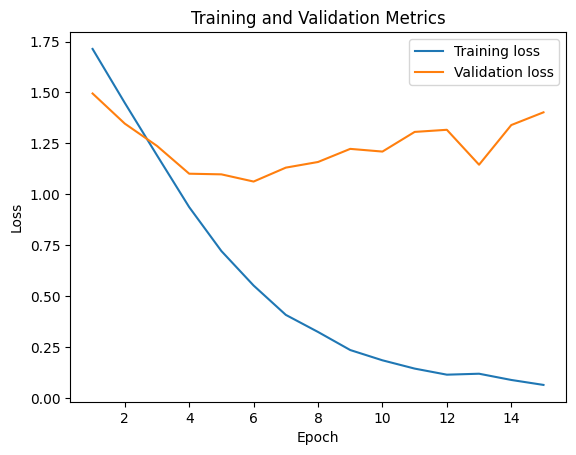

In [47]:
plt.plot(epochs, train_loss_list, label='Training loss')
plt.plot(epochs, val_loss_list, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

## Evaluation

In [48]:
def compute_metrics(preds, labels):
    labels = labels
    preds = preds
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [49]:
# model.eval()

# test_predictions = []
# test_labels = []
# with torch.no_grad():
#   for batch in testloader:
#     inputs, mask, token_type_ids, labels = batch
#     inputs = inputs.squeeze().to(device)
#     mask = mask.squeeze().to(device)
#     labels = labels.to(device)
#     outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)
#     outputs.to(device)
#     loss = criterion(outputs, labels)
#     logits = outputs
#     test_predictions.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
#     test_labels.extend(labels.cpu().numpy().tolist())

# test_acc = accuracy_score(test_labels, test_predictions)
# test_f1 = f1_score(test_labels, test_predictions)
# print('Test accuracy:', test_acc)
# print('Test F1 score:', test_f1)
# import os
# os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

model.eval()
test_predictions = []
test_labels = []
with torch.no_grad():
  for batch in testloader:
    inputs, mask, token_type_ids, labels = batch
    inputs = inputs.squeeze().to(device)
    mask = mask.squeeze().to(device)
    labels = labels.to(device)
    outputs = model(inputs, attention_mask=mask, token_type_ids=token_type_ids)
    outputs.to(device)
    loss = criterion(outputs, labels)
    logits = outputs
    test_predictions.extend(logits.argmax(dim=-1).cpu().numpy().tolist())
    test_labels.extend(labels.cpu().numpy().tolist())

test_acc = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions, average='weighted')
print('Test accuracy:', test_acc)
print('Test F1 score:', test_f1)

Test accuracy: 0.8236695790309769
Test F1 score: 0.8246323965119993


In [50]:
compute_metrics(test_predictions, test_labels)

{'accuracy': 0.8236695790309769,
 'f1': array([0.71794872, 0.85409253, 0.85517241, 0.83921569, 0.80263158,
        0.7751938 ]),
 'precision': array([0.93333333, 0.91603053, 0.91625616, 0.79850746, 0.7593361 ,
        0.74074074]),
 'recall': array([0.58333333, 0.8       , 0.80172414, 0.88429752, 0.85116279,
        0.81300813])}

In [51]:
print(classification_report(test_labels, test_predictions))

              precision    recall  f1-score   support

           0       0.93      0.58      0.72        24
           1       0.92      0.80      0.85       300
           2       0.92      0.80      0.86       232
           3       0.80      0.88      0.84       242
           4       0.76      0.85      0.80       215
           5       0.74      0.81      0.78       246

    accuracy                           0.82      1259
   macro avg       0.84      0.79      0.81      1259
weighted avg       0.83      0.82      0.82      1259



In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# %pwd
%cd drive/MyDrive/storage

[Errno 2] No such file or directory: 'drive/MyDrive/storage'
/content


In [54]:
%pwd

'/content'

In [55]:
torch.save(model.state_dict(), 'bertfinal.pt')

In [57]:
loaded = BertRoBERTaClass()
loaded.load_state_dict(torch.load('bertfinal.pt'))
loaded.to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-57-e624cd06ceab>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recomm

BertRoBERTaClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, el

In [59]:
outputs = loaded(input_ids = inputs, attention_mask = mask, token_type_ids = token_type_ids)

In [60]:
outputs

tensor([[-2.0385, -2.3785, -1.8426, -0.7531, -0.2322,  5.7123],
        [-2.0061, -1.1850, -1.2047, -1.5133, -0.7489,  5.4420],
        [-2.4409, -1.3400, -2.2433, -0.6271,  4.8159, -0.9352],
        [-1.8496, -2.5035, -1.0268, -1.3290, -0.9345,  5.5805],
        [-1.5635, -2.2700, -1.2553, -2.2584,  0.5816,  5.2755],
        [-2.4420, -1.6718, -1.0983, -1.3458, -0.3593,  5.3621],
        [-1.3176, -1.7685, -1.8132, -1.1490, -0.7010,  4.9460],
        [-2.1173, -0.8317, -1.7113, -0.7044,  4.8559, -1.4415],
        [-2.6634, -1.6208, -1.1888, -0.4047, -0.9200,  4.8619],
        [-2.2165, -1.3847, -1.8341, -0.9405,  4.8354, -1.0807],
        [-1.9550, -2.1726, -1.9185, -0.5688, -1.3047,  5.5950]],
       device='cuda:0', grad_fn=<AddmmBackward0>)